# EP and CP Events
### Definition of EP and CP events from Sullivan 2016

1. Define Nino3
2. Define Nino4
3. Define EP event
4. Define CP event
5. Plot typical rainfall response to EP and CP events

In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in datasets
ersst_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/ersstv5.1854_2019.nc')
awap_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/rr_monthly_0.25.1900-2015.nc')
cmap_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/cmap.precip.mon.mean.1979_2018.nc')

In [3]:
#Select varaibles
sst = ersst_ds.sst
awap_precip = awap_ds.rr
cmap_precip = cmap_ds.precip

In [4]:
#Calculate ersst Nino3 index (Not normalised, just anom)
nino3_region = sst.sel(lat=slice(5,-5), lon=slice(210,270)) #Converted from deg west to deg east (deg west = 360 - deg east)
nino3_clim = nino3_region.sel(time=slice('1950-01', '1979-12')).mean(dim='time')
nino3_anom = (nino3_region - nino3_clim).mean(dim='lat').mean(dim='lon')
nino3 = nino3_anom.sel(time=slice('1950-01', '2015-12'))

#Calculate ersst Nino4 index (Not normalised, just anom)
nino4_region = sst.sel(lat=slice(5,-5), lon=slice(160,210)) #Converted from deg west to deg east (deg west = 360 - deg east)
nino4_clim = nino4_region.sel(time=slice('1950-01', '1979-12')).mean(dim='time')
nino4_anom = (nino4_region - nino4_clim).mean(dim='lat').mean(dim='lon')
nino4 = nino4_anom.sel(time=slice('1950-01', '2015-12'))

In [5]:
seasonyear_awap = (awap_precip.time.dt.year + (awap_precip.time.dt.month//12))
awap_precip.coords['seasonyear'] = seasonyear_awap
seasonyear_cmap = (cmap_precip.time.dt.year + (cmap_precip.time.dt.month//12))
cmap_precip.coords['seasonyear'] = seasonyear_cmap
seasonyear_nino3 = (nino3.time.dt.year + (nino3.time.dt.month//12))
nino3.coords['seasonyear'] = seasonyear_nino3
seasonyear_nino4 = (nino4.time.dt.year + (nino4.time.dt.month//12))
nino4.coords['seasonyear'] = seasonyear_nino4
seasonyear_sst = (sst.time.dt.year + (sst.time.dt.month//12))
sst.coords['seasonyear'] = seasonyear_sst

In [6]:
def seasonal_mean(data):
    return data.groupby('time.season').mean()

In [7]:
yearly_seasonal_precip_awap = awap_precip.groupby('seasonyear').apply(seasonal_mean)
yearly_seasonal_precip_cmap = cmap_precip.groupby('seasonyear').apply(seasonal_mean)
yearly_seasonal_nino3 = nino3.groupby('seasonyear').apply(seasonal_mean)
yearly_seasonal_nino4 = nino4.groupby('seasonyear').apply(seasonal_mean)
yearly_seasonal_sst = sst.groupby('seasonyear').apply(seasonal_mean)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [8]:
nino3_djf = yearly_seasonal_nino3.sel(season='DJF')
nino4_djf = yearly_seasonal_nino4.sel(season='DJF')
awap_precip_djf = yearly_seasonal_precip_awap.sel(season='DJF')
cmap_precip_djf = yearly_seasonal_precip_cmap.sel(season='DJF')
sst_djf = yearly_seasonal_sst.sel(season='DJF')

In [9]:
ep_nino = nino3_djf.where((nino3_djf > 0.5) & (nino4_djf > 0.5) & (nino3_djf > nino4_djf), drop=True)
cp_nino = nino4_djf.where((nino3_djf > 0.5) & (nino4_djf > 0.5) & (nino3_djf < nino4_djf), drop=True)

In [10]:
ep_precip_au = awap_precip_djf.where(awap_precip_djf.seasonyear.isin(ep_nino.seasonyear.values), drop = True).mean(dim='seasonyear')
ep_precip_gl = cmap_precip_djf.where(cmap_precip_djf.seasonyear.isin(ep_nino.seasonyear.values), drop = True).mean(dim='seasonyear')
cp_precip_au = awap_precip_djf.where(awap_precip_djf.seasonyear.isin(cp_nino.seasonyear.values), drop = True).mean(dim='seasonyear')
cp_precip_gl = cmap_precip_djf.where(cmap_precip_djf.seasonyear.isin(cp_nino.seasonyear.values), drop = True).mean(dim='seasonyear')
ep_sst = sst_djf.where(sst_djf.seasonyear.isin(ep_nino.seasonyear.values), drop = True).mean(dim='seasonyear')
cp_sst = sst_djf.where(sst_djf.seasonyear.isin(cp_nino.seasonyear.values), drop = True).mean(dim='seasonyear')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [11]:
mean = sst_djf.mean(dim='seasonyear')
ep_dif = ep_sst - mean
cp_dif = cp_sst - mean

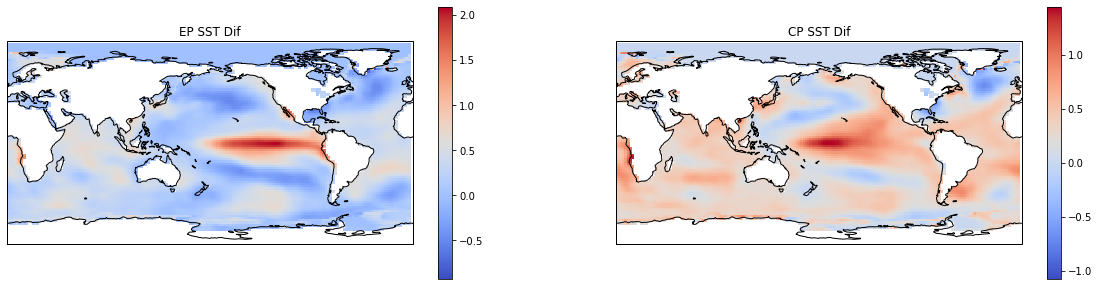

In [12]:
#Plot SST dif for EP and CP

f = plt.figure()

ax = f.add_subplot(121, projection=ccrs.PlateCarree(180))
ax.coastlines()
im = ax.pcolormesh(ep_dif.lon, ep_dif.lat, ep_dif, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.colorbar(im, ax=ax, shrink=0.5)
ax.set_title('EP SST Dif')

ax = f.add_subplot(122, projection=ccrs.PlateCarree(180))
ax.coastlines()
im = ax.pcolormesh(cp_dif.lon, cp_dif.lat, cp_dif, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.colorbar(im, ax=ax, shrink=0.5)
ax.set_title('CP SST Dif')

f.set_figheight(10)
f.set_figwidth(20)

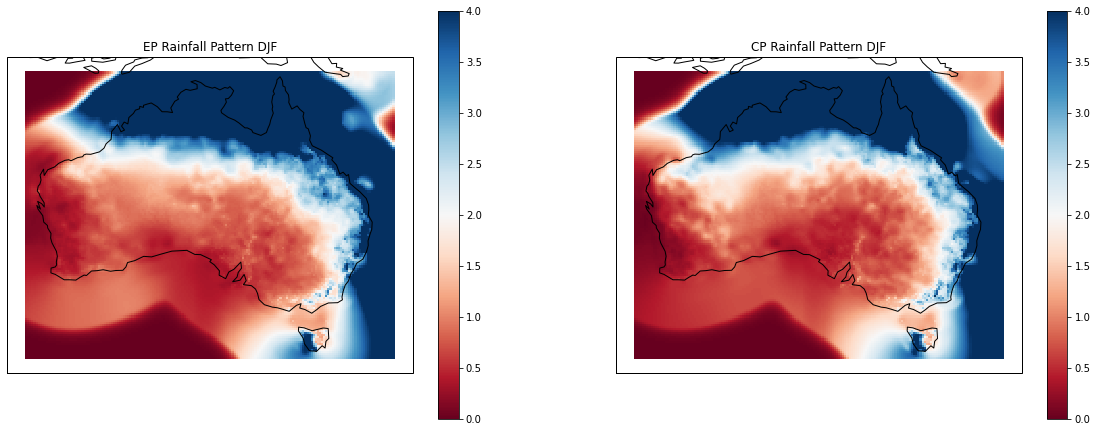

In [13]:
#Plot DJF rainfall pattern over aus for EP and CP

f = plt.figure()

ax = f.add_subplot(121, projection=ccrs.PlateCarree(180))
ax.coastlines()
im = ax.pcolormesh(ep_precip_au.lon, ep_precip_au.lat, ep_precip_au, transform=ccrs.PlateCarree(), cmap='RdBu')
im.set_clim(0, 4)
plt.colorbar(im, ax=ax, shrink=0.75)
ax.set_title('EP Rainfall Pattern DJF')

ax = f.add_subplot(122, projection=ccrs.PlateCarree(180))
ax.coastlines()
im = ax.pcolormesh(cp_precip_au.lon, cp_precip_au.lat, cp_precip_au, transform=ccrs.PlateCarree(), cmap='RdBu')
im.set_clim(0, 4)
plt.colorbar(im, ax=ax, shrink=0.75)
ax.set_title('CP Rainfall Pattern DJF')

f.set_figheight(10)
f.set_figwidth(20)

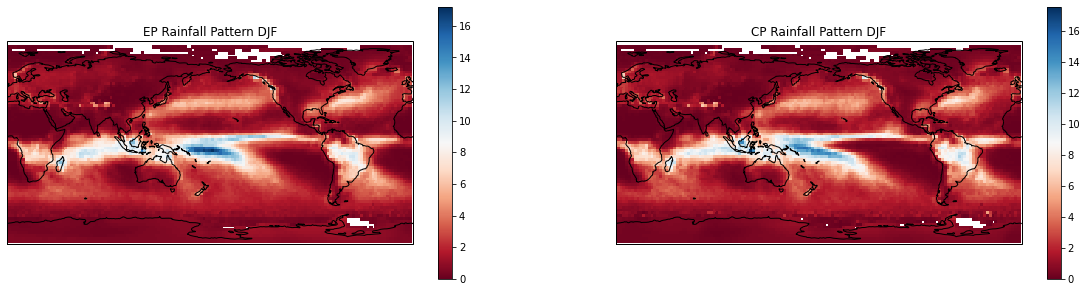

In [14]:
#Plot global DJF rainfall response for EP and CP

f = plt.figure()

ax = f.add_subplot(121, projection=ccrs.PlateCarree(180))
ax.coastlines()
im = ax.pcolormesh(ep_precip_gl.lon, ep_precip_gl.lat, ep_precip_gl, transform=ccrs.PlateCarree(), cmap='RdBu')
plt.colorbar(im, ax=ax, shrink=0.5)
ax.set_title('EP Rainfall Pattern DJF')

ax = f.add_subplot(122, projection=ccrs.PlateCarree(180))
ax.coastlines()
im = ax.pcolormesh(cp_precip_gl.lon, cp_precip_gl.lat, cp_precip_gl, transform=ccrs.PlateCarree(), cmap='RdBu')
plt.colorbar(im, ax=ax, shrink=0.5)
ax.set_title('CP Rainfall Pattern DJF')

f.set_figheight(10)
f.set_figwidth(20)